---
# Análise Exploratória de Dados - Bioestatística

- UTFPR
- Aline Mara Rudsit Bini
- 06/08/2021
- GitHub: https://github.com/aalinebini/CpG_Island

---
## Dataset: CpG Values of Smoking and Non Smoking Patients - Methylation values of selected CpG islands

### Variáveis existentes:
- __GSM:__ The GSM with which the full sample data can be located on NCBI
- __Smoking status:__ never = never smoked, current = currently smoking
- __Gender:__ Patient gender
- __Age:__ Patient age
- __cg00000:__ Methylation in current island (20)

---

## Ilhas CpG e metilação

Ilhas CpG são regiões do genoma humano com alta concentração de Citosina e Guanina, e, diferentemente de outras partes do genoma, não costumam passar pelo evento epigenético da metilação. Geralmente são associadas a regiões promotoras (60% em humanos). Quando metiladas, podem estar relacionadas tumores.

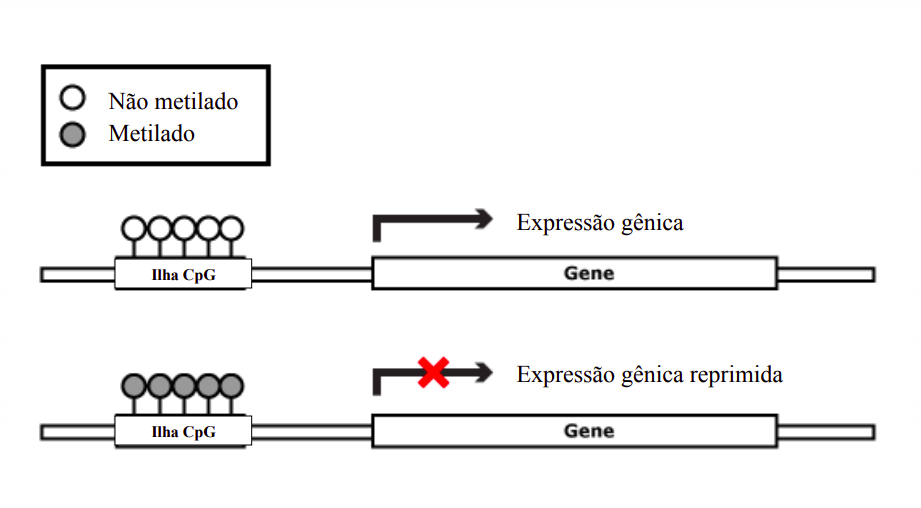

In [274]:
Image(filename='ilhas_cpg.png')

---

# Bibliotecas

In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.sandbox.stats.multicomp import multipletests
from scipy import stats
import warnings
from IPython.display import Image

In [276]:
warnings.filterwarnings('ignore')

In [277]:
my_pal = 'husl'
sns.color_palette("husl", 20)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9579148533500138, 0.358831186992106, 0.9474115985773391),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9651791951613143, 0.4212549802305815, 0.6785112441648762)]

---
# Dataset

In [278]:
dataset = pd.read_csv("Smoker_Epigenetic_df.csv", sep=",")
print('-----------------------------')
print('Dimensão do dataset:{}'.format(dataset.shape))
print('-----------------------------')
dataset.head()

-----------------------------
Dimensão do dataset:(683, 24)
-----------------------------


,GSM,Smoking Status,Gender,Age,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,GSM1051525,current,f,67,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,...,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,GSM1051526,current,f,49,0.345054,0.568662,0.500600,0.498607,0.374591,0.190274,...,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,GSM1051527,current,f,53,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,...,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,GSM1051528,current,f,62,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,...,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,GSM1051529,never,f,33,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,...,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857


In [279]:
print('------------------')
print("Colunas/variáveis:")
print('------------------')
dataset.columns

------------------
Colunas/variáveis:
------------------


Index(['GSM', 'Smoking Status', 'Gender', 'Age', 'cg00050873', 'cg00212031',
       'cg00213748', 'cg00214611', 'cg00455876', 'cg01707559', 'cg02004872',
       'cg02011394', 'cg02050847', 'cg02233190', 'cg02494853', 'cg02839557',
       'cg02842889', 'cg03052502', 'cg03155755', 'cg03244189', 'cg03443143',
       'cg03683899', 'cg03695421', 'cg03706273'],
      dtype='object')

In [280]:
print('--------------------------------------------')
print('Valores nulos existentes para cada variável:')
print('--------------------------------------------')
dataset.isna().sum()

--------------------------------------------
Valores nulos existentes para cada variável:
--------------------------------------------


GSM                0
Smoking Status     0
Gender             0
Age                0
cg00050873        62
cg00212031        62
cg00213748        62
cg00214611        62
cg00455876        62
cg01707559        62
cg02004872        62
cg02011394        62
cg02050847        62
cg02233190        62
cg02494853        62
cg02839557        62
cg02842889        62
cg03052502        62
cg03155755        62
cg03244189        62
cg03443143        62
cg03683899        62
cg03695421        62
cg03706273        62
dtype: int64

In [281]:
print('---------------------------')
print('Remoção das variáveis nulas')
dataset.dropna(inplace=True)
print('Nova dimensão:',dataset.shape)
print('---------------------------')
dataset.head()

---------------------------
Remoção das variáveis nulas
Nova dimensão: (621, 24)
---------------------------


,GSM,Smoking Status,Gender,Age,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,GSM1051525,current,f,67,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,...,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,GSM1051526,current,f,49,0.345054,0.568662,0.500600,0.498607,0.374591,0.190274,...,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,GSM1051527,current,f,53,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,...,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,GSM1051528,current,f,62,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,...,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,GSM1051529,never,f,33,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,...,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857


---
# Verificando variáveis

## GSM

In [282]:
print('-----------------------------------------------------')
print('Quantidade de valores únicos de GSM:', len(dataset.GSM.unique()))
print('Corresponde a todos os valores encontrados no dataset')
print('-----------------------------------------------------')

-----------------------------------------------------
Quantidade de valores únicos de GSM: 621
Corresponde a todos os valores encontrados no dataset
-----------------------------------------------------


## Smoking Status

In [283]:
print('---------------------------------------------')
print('Porcentagem de pessoas fumante e não fumante:')
dataset["Smoking Status"].value_counts(normalize=True)

---------------------------------------------
Porcentagem de pessoas fumante e não fumante:


current    0.689211
never      0.310789
Name: Smoking Status, dtype: float64

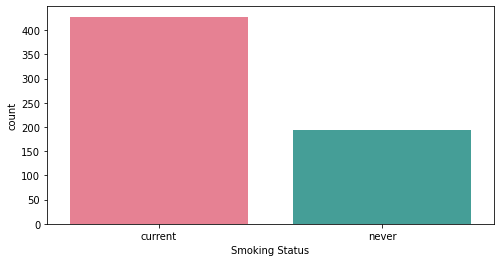

In [284]:
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x = dataset["Smoking Status"], palette=my_pal)

## Gender

In [285]:
print('---------------------------------------------')
print('Quantidade de pessoas de acordo com o gênero:')
dataset["Gender"] = dataset.Gender.str.strip()
dataset["Gender"].value_counts()

---------------------------------------------
Quantidade de pessoas de acordo com o gênero:


f    440
m    181
Name: Gender, dtype: int64

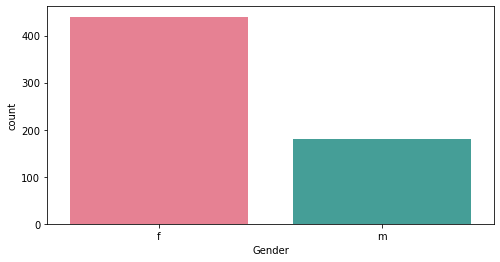

In [286]:
plt.figure(figsize=(8,4))
ax2 = sns.countplot(x = dataset["Gender"], palette=my_pal)

## Age

In [287]:
print('----------------------------------------------')
print('Descrição da distribuição contínua das idades:')
dataset["Age"].describe()

----------------------------------------------
Descrição da distribuição contínua das idades:


count    621.000000
mean      52.594203
std       11.453112
min       18.000000
25%       46.000000
50%       54.000000
75%       61.000000
max       70.000000
Name: Age, dtype: float64

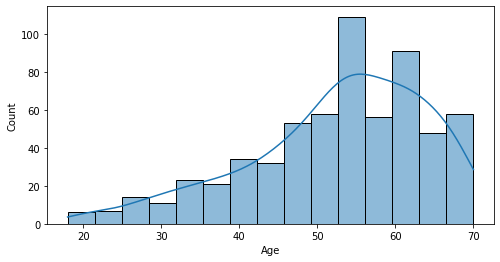

In [288]:
plt.figure(figsize=(8,4))
ax3 = sns.histplot(dataset["Age"], palette=my_pal, kde=True)

## Sítios de metilação

In [289]:
print('------------------------------------------------------')
print('Separação das colunas referentes às ilhas de metilação')
print('------------------------------------------------------')
ilhas_met = dataset[dataset.columns[4:]]
ilhas_met.head()

------------------------------------------------------
Separação das colunas referentes às ilhas de metilação
------------------------------------------------------


,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,cg02011394,cg02050847,cg02233190,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,0.179144,0.480252,0.327608,0.241120,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,0.345054,0.568662,0.500600,0.498607,0.374591,0.190274,0.155977,0.418081,0.346463,0.175491,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,0.105745,0.615103,0.237539,0.246409,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,0.111286,0.301020,0.304535,0.177028,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,0.169108,0.392975,0.306226,0.301701,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857


------------------------------------
Verificando a existência de outliers
------------------------------------


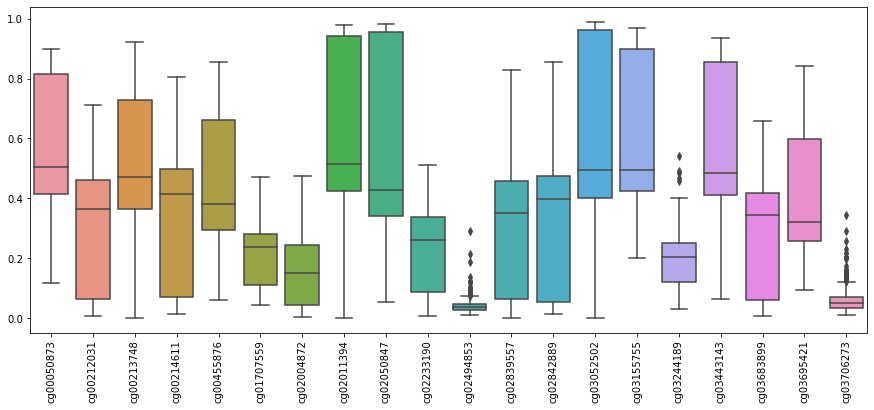

In [290]:
print('------------------------------------')
print('Verificando a existência de outliers')
print('------------------------------------')

plt.figure(figsize=(15,6))
ax = sns.boxplot(data=ilhas_met)
ax = plt.xticks(rotation=90)

----------------------------------------------------------------------------------------------
- Gráfico de estimativa de densidade de kernel (KDE): visualizar a distribuição de observações
- Representa os dados usando uma curva de densidade de probabilidade contínua
----------------------------------------------------------------------------------------------


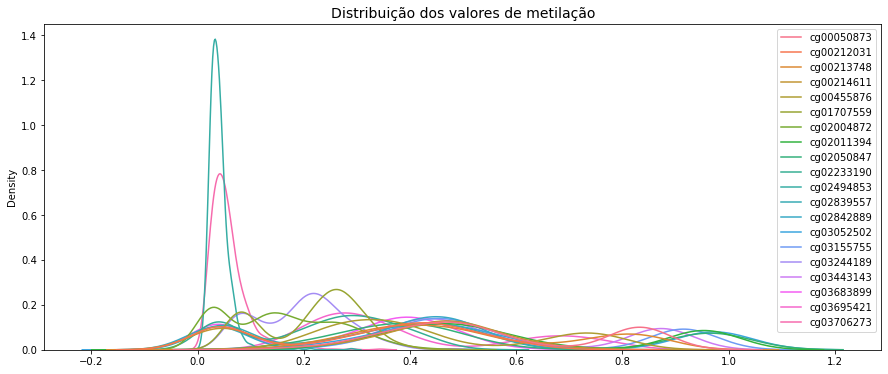

In [291]:
print('----------------------------------------------------------------------------------------------')
print('- Gráfico de estimativa de densidade de kernel (KDE): visualizar a distribuição de observações')
print('- Representa os dados usando uma curva de densidade de probabilidade contínua')
print('----------------------------------------------------------------------------------------------')

plt.figure(figsize=(15,6))
plt.title('Distribuição dos valores de metilação', fontsize=14)
ax = sns.kdeplot(data=ilhas_met, palette=my_pal)

------------------------------------------------------------
- Gráfico de correlação entre as ilhas de metilação
- Indicação de como duas variáveis estão associadas entre si
------------------------------------------------------------


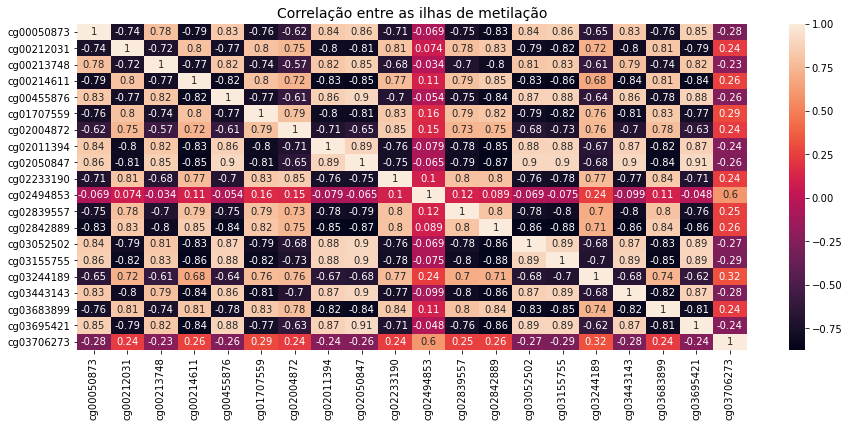

In [292]:
print('------------------------------------------------------------')
print('- Gráfico de correlação entre as ilhas de metilação')
print('- Indicação de como duas variáveis estão associadas entre si')
print('------------------------------------------------------------')

plt.figure(figsize=(15,6))
plt.title('Correlação entre as ilhas de metilação', fontsize=14)
ax = sns.heatmap(ilhas_met.corr(), annot=True)

- É possível notar a predominância entre valores próximos ao intervalo inferior e próximos ao intervalo superior de acordo com as cores opostas. Isto demonstra uma relação existente entre as variáveis, sejam elas diretamente ou inversamente relacionadas.

### Verificando a normalidade dos dados de metilação

#### QQ-Plot

In [293]:
islands = dataset.columns[4:]

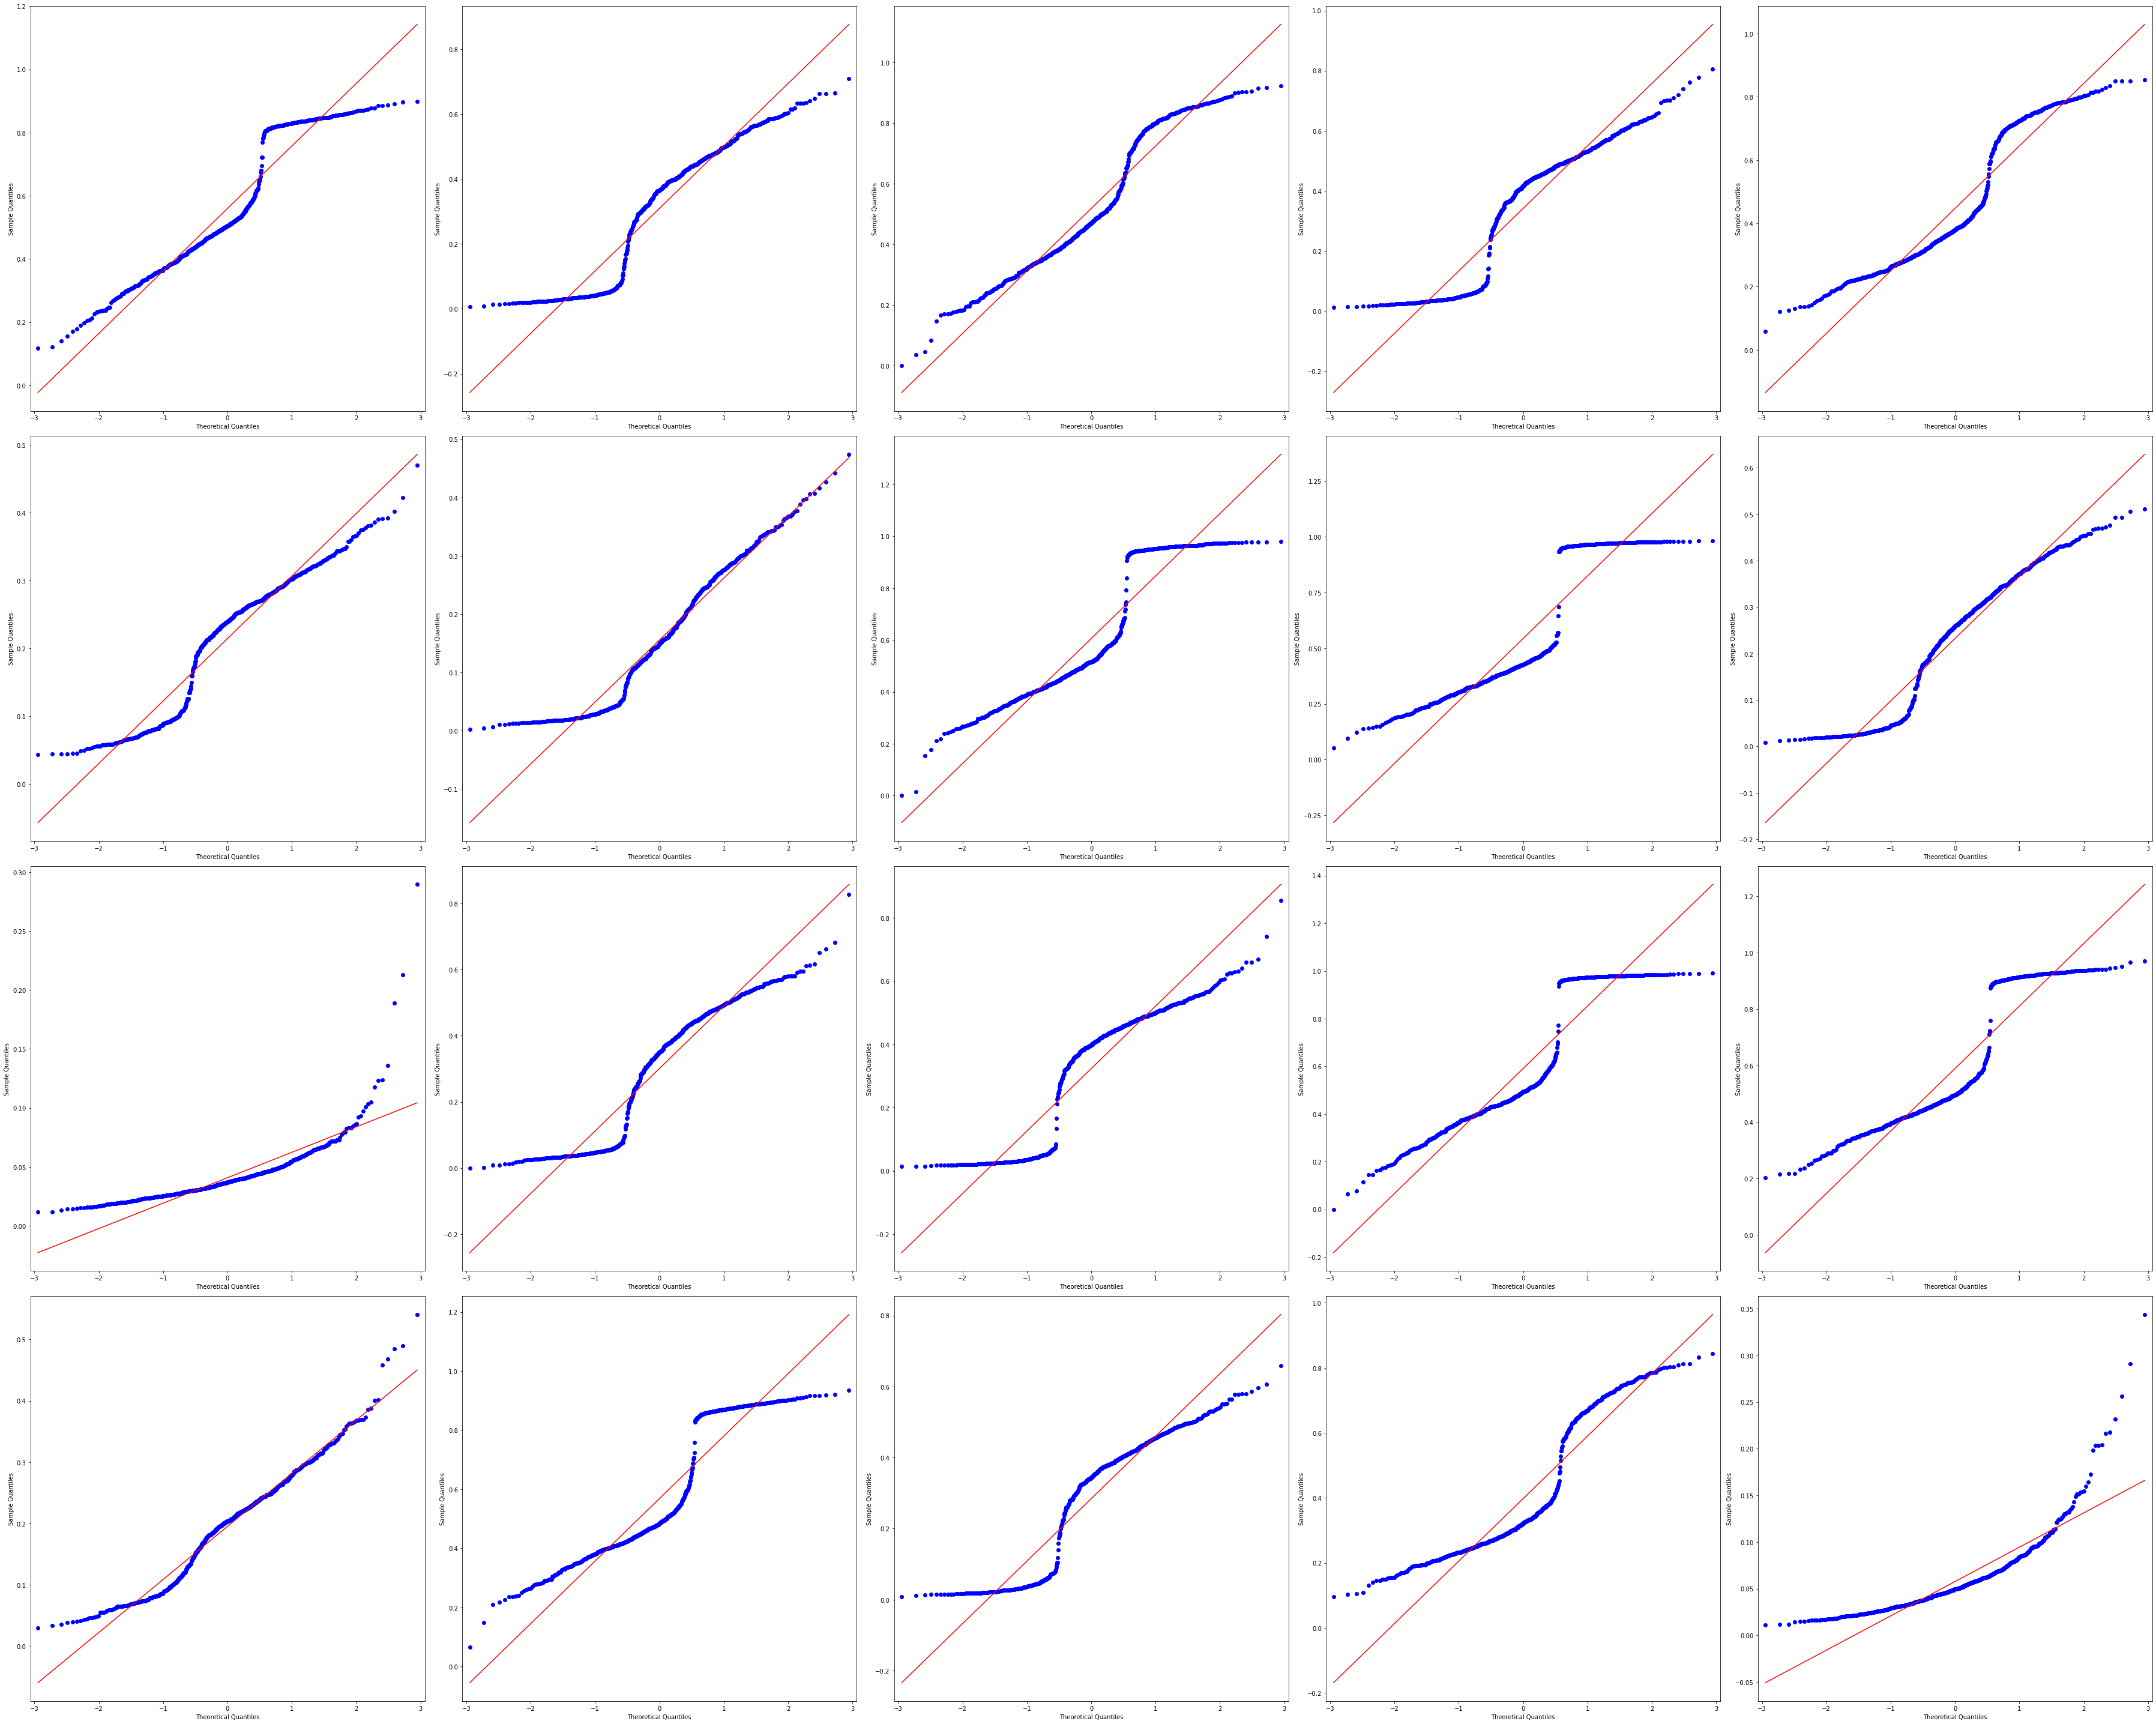

In [294]:
_,axs = plt.subplots(4, 5, figsize=(50,40))
axs = axs.ravel()
for i,island in enumerate(islands):
    qqplot(ilhas_met[island].values, line='s', ax=axs[i])
    plt.tight_layout()

- Apenas através dos gráficos QQ-Plot não foi possível concluir totalmente a respeito da distribuição normal de todas as ilhas. Para confirmar a inferência a respeito da não normalidade dos dados, foi realizado um teste de hipótese com significância igual a 0.05 para cada ilha de metilação, conforme abaixo.

---
# Teste de Hipótese

- Passo 1: Declarar a hipótese nula e a hipótese alternativa
    - A hipótese nula pode ser rejeitada ou não rejeitada
    
    
- Passo 2: Fixar um valor para o nível de significância alfa
    - Pr{"Rejeitar uma hipótese quando ela é verdadeira"} = alfa
    - alfa: 0.01 é mais conservador que escolher 0.05
    
    
- Passo 3: Escolher uma estatística de teste, um valor calculado a partir das observações


- Passo 4: Determinar quando o valor da estatística do teste levará a uma rejeição da hipótese nula


- Passo 5: Obter o dados e verificar se os valores observados da estatística do teste leva a uma aceitação ou rejeição da hipótese nula

---
- Por se tratar de dados que não seguem uma distribuição normal, o teste escolhido para aplicar nas hipóteses foi  o de **Mann-Whitney**, considerado como o teste t de Student não paramétrico.


- Usualmente, para dados de metilação aplica-se a técnica de ajuste de **Bonferroni** no p-value, no objetivo de aumentar a taxa de falsos negativos através da multiplicação dos p-valores encontrados pelo número de testes total.
        - Referências: https://dx.doi.org/10.22074%2Fcellj.2019.5992, https://doi.org/10.1002/hep.25569
        
        
- Significância = 0.05
---

In [295]:
significancia = 0.05

## 1 - As ilhas de metilação seguem uma distribuição normal?

$$\begin{array}{l}H_0:{\mu}=\mu_0\mbox{ (As ilhas de metilação seguem uma distribuição normal) }\\H_1:\mu\neq\mu_0 \mbox{ (As ilhas de metilação não seguem uma distribuição normal)} \end{array}$$

In [317]:
p_values_1 = list()

for col in ilhas_met.columns:
    p_values_1.append(stats.normaltest(ilhas_met[col])[1]) # teste normal
    
# Aplicando o ajuste de Bonferroni
p_values_bonferroni = multipletests(p_values_1, alpha=significancia, method='bonferroni')[1].round(2)

print('--------------------------------------------------------')
print('\t\t\tRESULTADO')
print('--------------------------------------------------------')
for i, p in enumerate(p_values_bonferroni):
    if p < significancia:
        print('Ilha {} - Hipótese nula rejeitada: p-value={}'.format(islands[i], p))
    else:
        print('Ilha {} - Hipótese nula não rejeitada: p-value={}'.format(islands[i], p))

--------------------------------------------------------
			RESULTADO
--------------------------------------------------------
Ilha cg00050873 - Hipótese nula rejeitada: p-value=0.0
Ilha cg00212031 - Hipótese nula rejeitada: p-value=0.0
Ilha cg00213748 - Hipótese nula rejeitada: p-value=0.0
Ilha cg00214611 - Hipótese nula rejeitada: p-value=0.0
Ilha cg00455876 - Hipótese nula rejeitada: p-value=0.0
Ilha cg01707559 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02004872 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02011394 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02050847 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02233190 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02494853 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02839557 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02842889 - Hipótese nula rejeitada: p-value=0.0
Ilha cg03052502 - Hipótese nula rejeitada: p-value=0.0
Ilha cg03155755 - Hipótese nula rejeitada: p-value=0.0
Ilha cg03244189 - Hipótese nula não rejeitada: p

- A grande maioria das ilhas de metilação tiveram sua hipótese nula rejeitada, indicando que não seguem uma distribuição normal.

## 2 - As ilhas são diferencialmente metiladas entre fumantes e não fumantes?

$$\begin{array}{l}H_0:{\mu}=\mu_0\mbox{ (As ilhas são igualmente metiladas para fumantes e para não fumantes) }\\H_1:\mu\neq\mu_0 \mbox{ (As ilhas não são igualmente metiladas para fumantes e para não fumantes)} \end{array}$$

In [297]:
teste_2 = dataset.drop(columns=['GSM', 'Gender', 'Age'])
teste_2.head()

,Smoking Status,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,cg02011394,cg02050847,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,current,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,0.179144,0.480252,0.327608,...,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,current,0.345054,0.568662,0.500600,0.498607,0.374591,0.190274,0.155977,0.418081,0.346463,...,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,current,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,0.105745,0.615103,0.237539,...,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,current,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,0.111286,0.301020,0.304535,...,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,never,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,0.169108,0.392975,0.306226,...,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857


In [318]:
p_values_2 = list()

for col in teste_2.columns[1:]:
    current = teste_2.loc[teste1['Smoking Status'] == 'current', col].values
    never = teste_2.loc[teste1['Smoking Status'] == 'never', col].values
    
    p_value = stats.mannwhitneyu(current,never)[1] # teste Mann-Whitney
    
    p_values_2.append(p_value)
    
# Aplicando o ajuste de Bonferroni
p_values_bonferroni = multipletests(p_values_2, alpha=significancia, method='bonferroni')[1].round(2)


print('--------------------------------------------------------')
print('\t\t\tRESULTADO')
print('--------------------------------------------------------')
for i, p in enumerate(p_values_bonferroni):
    if p < significancia:
        print('Ilha {} - Hipótese nula rejeitada: p-value={}'.format(islands[i], p))
    else:
        print('Ilha {} - Hipótese nula não rejeitada: p-value={}'.format(islands[i], p))

--------------------------------------------------------
			RESULTADO
--------------------------------------------------------
Ilha cg00050873 - Hipótese nula não rejeitada: p-value=0.41
Ilha cg00212031 - Hipótese nula não rejeitada: p-value=0.83
Ilha cg00213748 - Hipótese nula não rejeitada: p-value=0.58
Ilha cg00214611 - Hipótese nula não rejeitada: p-value=1.0
Ilha cg00455876 - Hipótese nula não rejeitada: p-value=1.0
Ilha cg01707559 - Hipótese nula não rejeitada: p-value=1.0
Ilha cg02004872 - Hipótese nula não rejeitada: p-value=0.41
Ilha cg02011394 - Hipótese nula não rejeitada: p-value=0.12
Ilha cg02050847 - Hipótese nula não rejeitada: p-value=1.0
Ilha cg02233190 - Hipótese nula não rejeitada: p-value=0.1
Ilha cg02494853 - Hipótese nula não rejeitada: p-value=1.0
Ilha cg02839557 - Hipótese nula não rejeitada: p-value=0.3
Ilha cg02842889 - Hipótese nula rejeitada: p-value=0.04
Ilha cg03052502 - Hipótese nula não rejeitada: p-value=0.38
Ilha cg03155755 - Hipótese nula não rejeitad

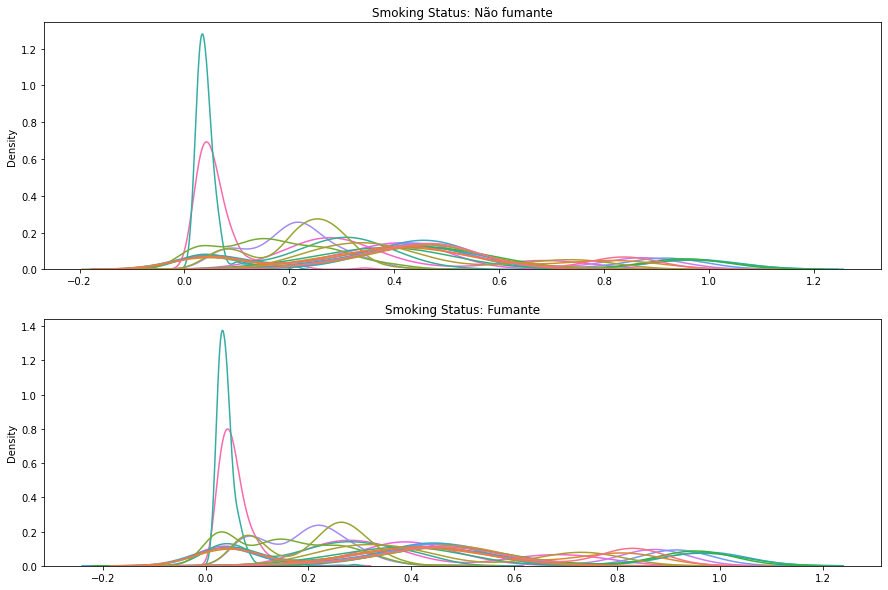

In [299]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

ax0 = sns.kdeplot(data=teste_2[teste_2['Smoking Status'] == 'never'], ax=axes[0], legend=False)
ax1 = sns.kdeplot(data=teste_2[teste_2['Smoking Status'] == 'current'], ax=axes[1], legend=False)

ax0.set_title('Smoking Status: Não fumante')
ax1.set_title('Smoking Status: Fumante')

plt.show()

- De acordo com os dados aplicados, as ilhas são diferencialmente metiladas para fumantes e não fumantes em praticamente todas as ilhas, com exceção de uma (cg02842889).

## 3 - Pessoas com idade igual ou maior que 50 anos e fumantes costumam ter ilhas com valores iguais de metilação em relação a não fumantes?

$$\begin{array}{l}H_0:{\mu}=\mu_0\mbox{ (Ilhas com valores iguais para fumantes e para não fumantes acima de 40 anos) }\\H_1:\mu\neq\mu_0 \mbox{ (Ilhas com valores diferentes para fumantes e para não fumantes acima de 40 anos)} \end{array}$$

In [162]:
teste_3 = dataset.drop(columns=['GSM', 'Gender'])
teste_3 = teste_3[teste_3.Age > 50]
teste_3.head()

,Smoking Status,Age,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,cg02011394,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,current,67,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,0.179144,0.480252,...,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
2,current,53,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,0.105745,0.615103,...,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,current,62,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,0.111286,0.301020,...,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
5,current,59,0.622860,0.501685,0.263227,0.415746,0.475189,0.253904,0.260759,0.509792,...,0.025835,0.309210,0.321857,0.533367,0.571552,0.210975,0.377824,0.469361,0.343332,0.045779
6,never,66,0.409273,0.378416,0.242161,0.279939,0.234222,0.255936,0.128688,0.342160,...,0.035112,0.182076,0.398945,0.391416,0.451552,0.205956,0.436584,0.253315,0.094898,0.060545


In [319]:
p_values_3 = list()

for col in teste_3.columns[2:]:
    current = teste_3.loc[teste1['Smoking Status'] == 'current', col].values
    never = teste_3.loc[teste1['Smoking Status'] == 'never', col].values
    p_value = stats.mannwhitneyu(current,never)[1] # teste Mann-Whitney
    p_values_3.append(p_value)
    
# Aplicando o ajuste de Bonferroni
p_values_bonferroni = multipletests(p_values_3, alpha=significancia, method='bonferroni')[1].round(2)

print('--------------------------------------------------------')
print('\t\t\tRESULTADO')
print('--------------------------------------------------------')
for i, p in enumerate(p_values_bonferroni):
    if p < significancia:
        print('Ilha {} - Hipótese nula rejeitada: p-value={}'.format(islands[i], p))
    else:
        print('Ilha {} - Hipótese nula não rejeitada: p-value={}'.format(islands[i], p))

--------------------------------------------------------
			RESULTADO
--------------------------------------------------------
Ilha cg00050873 - Hipótese nula rejeitada: p-value=0.01
Ilha cg00212031 - Hipótese nula não rejeitada: p-value=0.07
Ilha cg00213748 - Hipótese nula não rejeitada: p-value=0.05
Ilha cg00214611 - Hipótese nula não rejeitada: p-value=0.67
Ilha cg00455876 - Hipótese nula não rejeitada: p-value=0.52
Ilha cg01707559 - Hipótese nula não rejeitada: p-value=0.11
Ilha cg02004872 - Hipótese nula rejeitada: p-value=0.04
Ilha cg02011394 - Hipótese nula rejeitada: p-value=0.01
Ilha cg02050847 - Hipótese nula não rejeitada: p-value=0.09
Ilha cg02233190 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02494853 - Hipótese nula não rejeitada: p-value=1.0
Ilha cg02839557 - Hipótese nula não rejeitada: p-value=0.06
Ilha cg02842889 - Hipótese nula rejeitada: p-value=0.02
Ilha cg03052502 - Hipótese nula rejeitada: p-value=0.03
Ilha cg03155755 - Hipótese nula não rejeitada: p-value=0.1


- Com o critério em relação à idade, é possível verificar que algumas ilhas rejeitaram a hipótese nula, indicando diferenças entre as médias das metilações em pessoas acima de 50 anos. Com isto, é possível verificar as relações destas ilhas com alguns genes no NCBI:
        - cg02011394: Lesões de carcinoma de células escamosas de pulmão humano pré-invasivo
        - cg02233190: Fígado humano
        - cg02842889: Linfócitos do sangue periféricos (PBL), são linfócitos maduros que circulam no sangue em vez de se localizar em órgãos

## 4 - Homens e mulheres costumam ter ilhas de metilação com valores iguais?

$$\begin{array}{l}H_0:{\mu}=\mu_0\mbox{ (Valor de metilação é igual para homens e mulheres) }\\H_1:\mu\neq\mu_0 \mbox{ (Valor de metilação é diferente para homens e mulheres)} \end{array}$$

In [173]:
teste_4 = dataset.drop(columns=['GSM', 'Age', 'Smoking Status'])
teste_4.head()

,Gender,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,cg02011394,cg02050847,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,f,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,0.179144,0.480252,0.327608,...,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,f,0.345054,0.568662,0.500600,0.498607,0.374591,0.190274,0.155977,0.418081,0.346463,...,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,f,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,0.105745,0.615103,0.237539,...,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,f,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,0.111286,0.301020,0.304535,...,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,f,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,0.169108,0.392975,0.306226,...,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857


In [320]:
p_values_4 = list()

for col in teste_4.columns[2:]:
    f = teste_4.loc[teste_4['Gender'] == 'f', col].values
    m = teste_4.loc[teste_4['Gender'] == 'm', col].values
            
    p_value = stats.mannwhitneyu(f,m)[1] # teste Mann-Whitney
    p_values_4.append(p_value)
    
# Aplicando o ajuste de Bonferroni
p_values_bonferroni = multipletests(p_values_4, alpha=significancia, method='bonferroni')[1].round(2)

print('--------------------------------------------------------')
print('\t\t\tRESULTADO')
print('--------------------------------------------------------')
for i, p in enumerate(p_values_bonferroni):
    if p < significancia:
        print('Ilha {} - Hipótese nula rejeitada: p-value={}'.format(islands[i], p))
    else:
        print('Ilha {} - Hipótese nula não rejeitada: p-value={}'.format(islands[i], p))

--------------------------------------------------------
			RESULTADO
--------------------------------------------------------
Ilha cg00050873 - Hipótese nula rejeitada: p-value=0.0
Ilha cg00212031 - Hipótese nula rejeitada: p-value=0.0
Ilha cg00213748 - Hipótese nula rejeitada: p-value=0.0
Ilha cg00214611 - Hipótese nula rejeitada: p-value=0.0
Ilha cg00455876 - Hipótese nula rejeitada: p-value=0.0
Ilha cg01707559 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02004872 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02011394 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02050847 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02233190 - Hipótese nula rejeitada: p-value=0.02
Ilha cg02494853 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02839557 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02842889 - Hipótese nula rejeitada: p-value=0.0
Ilha cg03052502 - Hipótese nula rejeitada: p-value=0.0
Ilha cg03155755 - Hipótese nula rejeitada: p-value=0.0
Ilha cg03244189 - Hipótese nula rejeitada: p-va

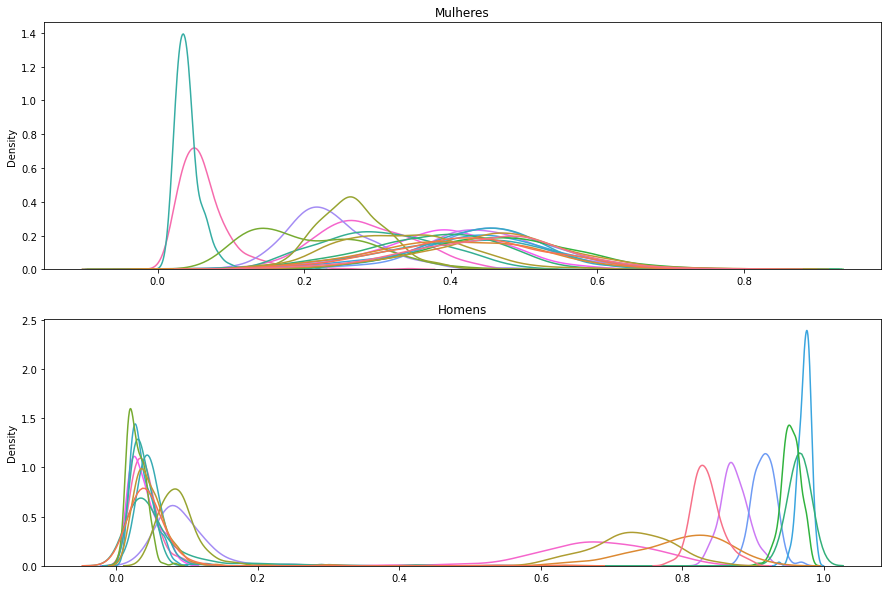

In [217]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

ax0 = sns.kdeplot(data=teste_4[teste_4['Gender'] == 'f'], ax=axes[0], legend=False)
ax1 = sns.kdeplot(data=teste_4[teste_4['Gender'] == 'm'], ax=axes[1], legend=False)

ax0.set_title('Mulheres')
ax1.set_title('Homens')

plt.show()

- O resultado do teste mostra que em todas as ilhas a hipótese nula foi rejeitada, ou seja, as ilhas de metilação possuem valores diferentes para homens e para mulheres. De acordo com os gráficos acima, é possível ver a distribuição diferente entre ambos.

## 5 - Homens e mulheres fumantes costumam ter ilhas de metilação com valores iguais?
$$\begin{array}{l}H_0:{\mu}=\mu_0\mbox{ (Valor de metilação em fumantes é igual para homens e mulheres) }\\H_1:\mu\neq\mu_0 \mbox{ (Valor de metilação em fumantes é diferente para homens e mulheres)} \end{array}$$

In [234]:
teste_5 = dataset.drop(columns=['GSM', 'Age'])
teste_5 = teste_5[teste_5['Smoking Status'] == 'never']
teste_5.head()

,Smoking Status,Gender,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,cg02011394,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
4,never,f,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,0.169108,0.392975,...,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857
6,never,f,0.409273,0.378416,0.242161,0.279939,0.234222,0.255936,0.128688,0.342160,...,0.035112,0.182076,0.398945,0.391416,0.451552,0.205956,0.436584,0.253315,0.094898,0.060545
9,never,m,0.820439,0.028893,0.884066,0.032633,0.850011,0.055499,0.014671,0.952861,...,0.021319,0.045582,0.018422,0.963112,0.923062,0.048921,0.872822,0.015901,0.599377,0.023780
13,never,m,0.811617,0.050635,0.702572,0.038536,0.782747,0.093371,0.019781,0.941181,...,0.032806,0.053789,0.024806,0.960137,0.907801,0.105327,0.836242,0.016548,0.753840,0.087151
20,never,m,0.872284,0.040910,0.843836,0.020425,0.798345,0.048114,0.024653,0.963786,...,0.015768,0.045062,0.027580,0.976696,0.927992,0.059470,0.880527,0.030077,0.731918,0.023716


In [321]:
p_values_5 = list()

for col in teste_5.columns[2:]:
    f = teste_5.loc[teste_5['Gender'] == 'f', col].values
    m = teste_5.loc[teste_5['Gender'] == 'm', col].values
    p_value = stats.mannwhitneyu(f,m)[1] # teste Mann-Whitney
    p_values_5.append(p_value)
    
# Aplicando o ajuste de Bonferroni
p_values_bonferroni = multipletests(p_values_5, alpha=significancia, method='bonferroni')[1].round(2)

print('--------------------------------------------------------')
print('\t\t\tRESULTADO')
print('--------------------------------------------------------')
for i, p in enumerate(p_values_bonferroni):
    if p < significancia:
        print('Ilha {} - Hipótese nula rejeitada: p-value={}'.format(islands[i], p))
    else:
        print('Ilha {} - Hipótese nula não rejeitada: p-value={}'.format(islands[i], p))

--------------------------------------------------------
			RESULTADO
--------------------------------------------------------
Ilha cg00050873 - Hipótese nula rejeitada: p-value=0.0
Ilha cg00212031 - Hipótese nula rejeitada: p-value=0.0
Ilha cg00213748 - Hipótese nula rejeitada: p-value=0.0
Ilha cg00214611 - Hipótese nula rejeitada: p-value=0.0
Ilha cg00455876 - Hipótese nula rejeitada: p-value=0.0
Ilha cg01707559 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02004872 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02011394 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02050847 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02233190 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02494853 - Hipótese nula não rejeitada: p-value=0.33
Ilha cg02839557 - Hipótese nula rejeitada: p-value=0.0
Ilha cg02842889 - Hipótese nula rejeitada: p-value=0.0
Ilha cg03052502 - Hipótese nula rejeitada: p-value=0.0
Ilha cg03155755 - Hipótese nula rejeitada: p-value=0.0
Ilha cg03244189 - Hipótese nula rejeitada: 

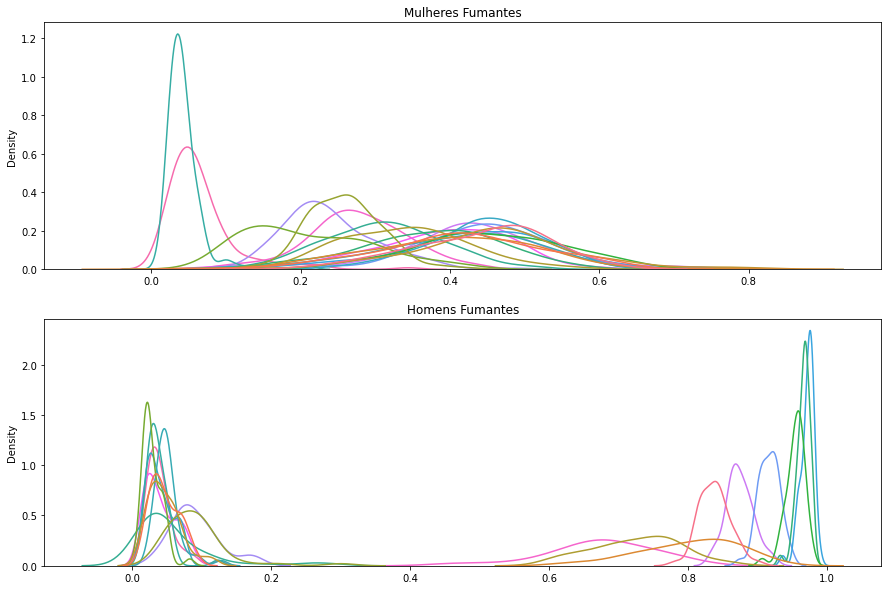

In [236]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

ax0 = sns.kdeplot(data=teste_5[teste_5['Gender'] == 'f'], ax=axes[0], legend=False)
ax1 = sns.kdeplot(data=teste_5[teste_5['Gender'] == 'm'], ax=axes[1], legend=False)

ax0.set_title('Mulheres Fumantes')
ax1.set_title('Homens Fumantes')

plt.show()

- Com exceção de uma ilha, todas tiveram a hipótese nula rejeitada, indicando que os valores de metilação para homens e mulheres fumantes são diferentes. Através do gráfico é possível visualizar a diferença, próxima à diferença de não fumantes conforme a hipótese número 4.

## Conclusão

Dentre as análises executadas, é possível concluir que
- há correlação entre as ilhas
- os níveis de metilação são diferentes para homens e mulheres, independentemente se fumantes ou não
- pessoas com 50 anos ou mais podem ter ilhas com metilação alterada, sendo algumas relacionadas a doenças 